# Project 3

Write a program (Python) with the following columns to predict if the person would survive or not.


1. Sex
2. Age
3. Pclass
4. Fare


And Calculate the Score of your model and store it into a TEXT file


In [2]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [3]:
df= pd.read_csv('titanic.csv',usecols=['Sex','Age','Pclass','Fare','Survived'])
df.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [5]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

c:\Python3104\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

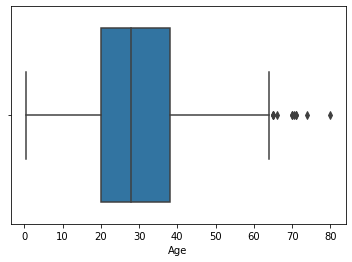

In [6]:
sns.boxplot(df.Age)

In [7]:
df['Age']=df.Age.fillna(df.Age.median())
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [8]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [9]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [10]:
# our inputs and targets
inputs = df.drop('Survived',axis='columns')
target = df['Survived']




In [11]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [12]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [13]:
# using label encoder fot Sex column
le_Sex = LabelEncoder()

In [14]:
inputs['Sex_n'] = le_Sex.fit_transform(inputs['Sex'])
inputs=inputs.drop('Sex',axis='columns')
inputs.head()


,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [15]:
model = tree.DecisionTreeClassifier()


prediction=model.fit(inputs, target)
prediction_score= [model.score(inputs,target)]


prediction_score


[0.9775533108866442]

In [16]:

 
#open file
file = open("Python.txt", "w")
 
#convert variable to string
str = repr(prediction_score)
file.write("prediction_score = " + str + "\n")
 
#close file
file.close()